# Section 15.7
## 15.6.1 Loading the MNIST Dataset

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 15.6.2 Data Exploration

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

### Visualizing Digits

In [7]:
# enable high-res images in notebook (not in the book's code)
%config InlineBackend.figure_format = 'retina'

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
sns.set(font_scale=2)

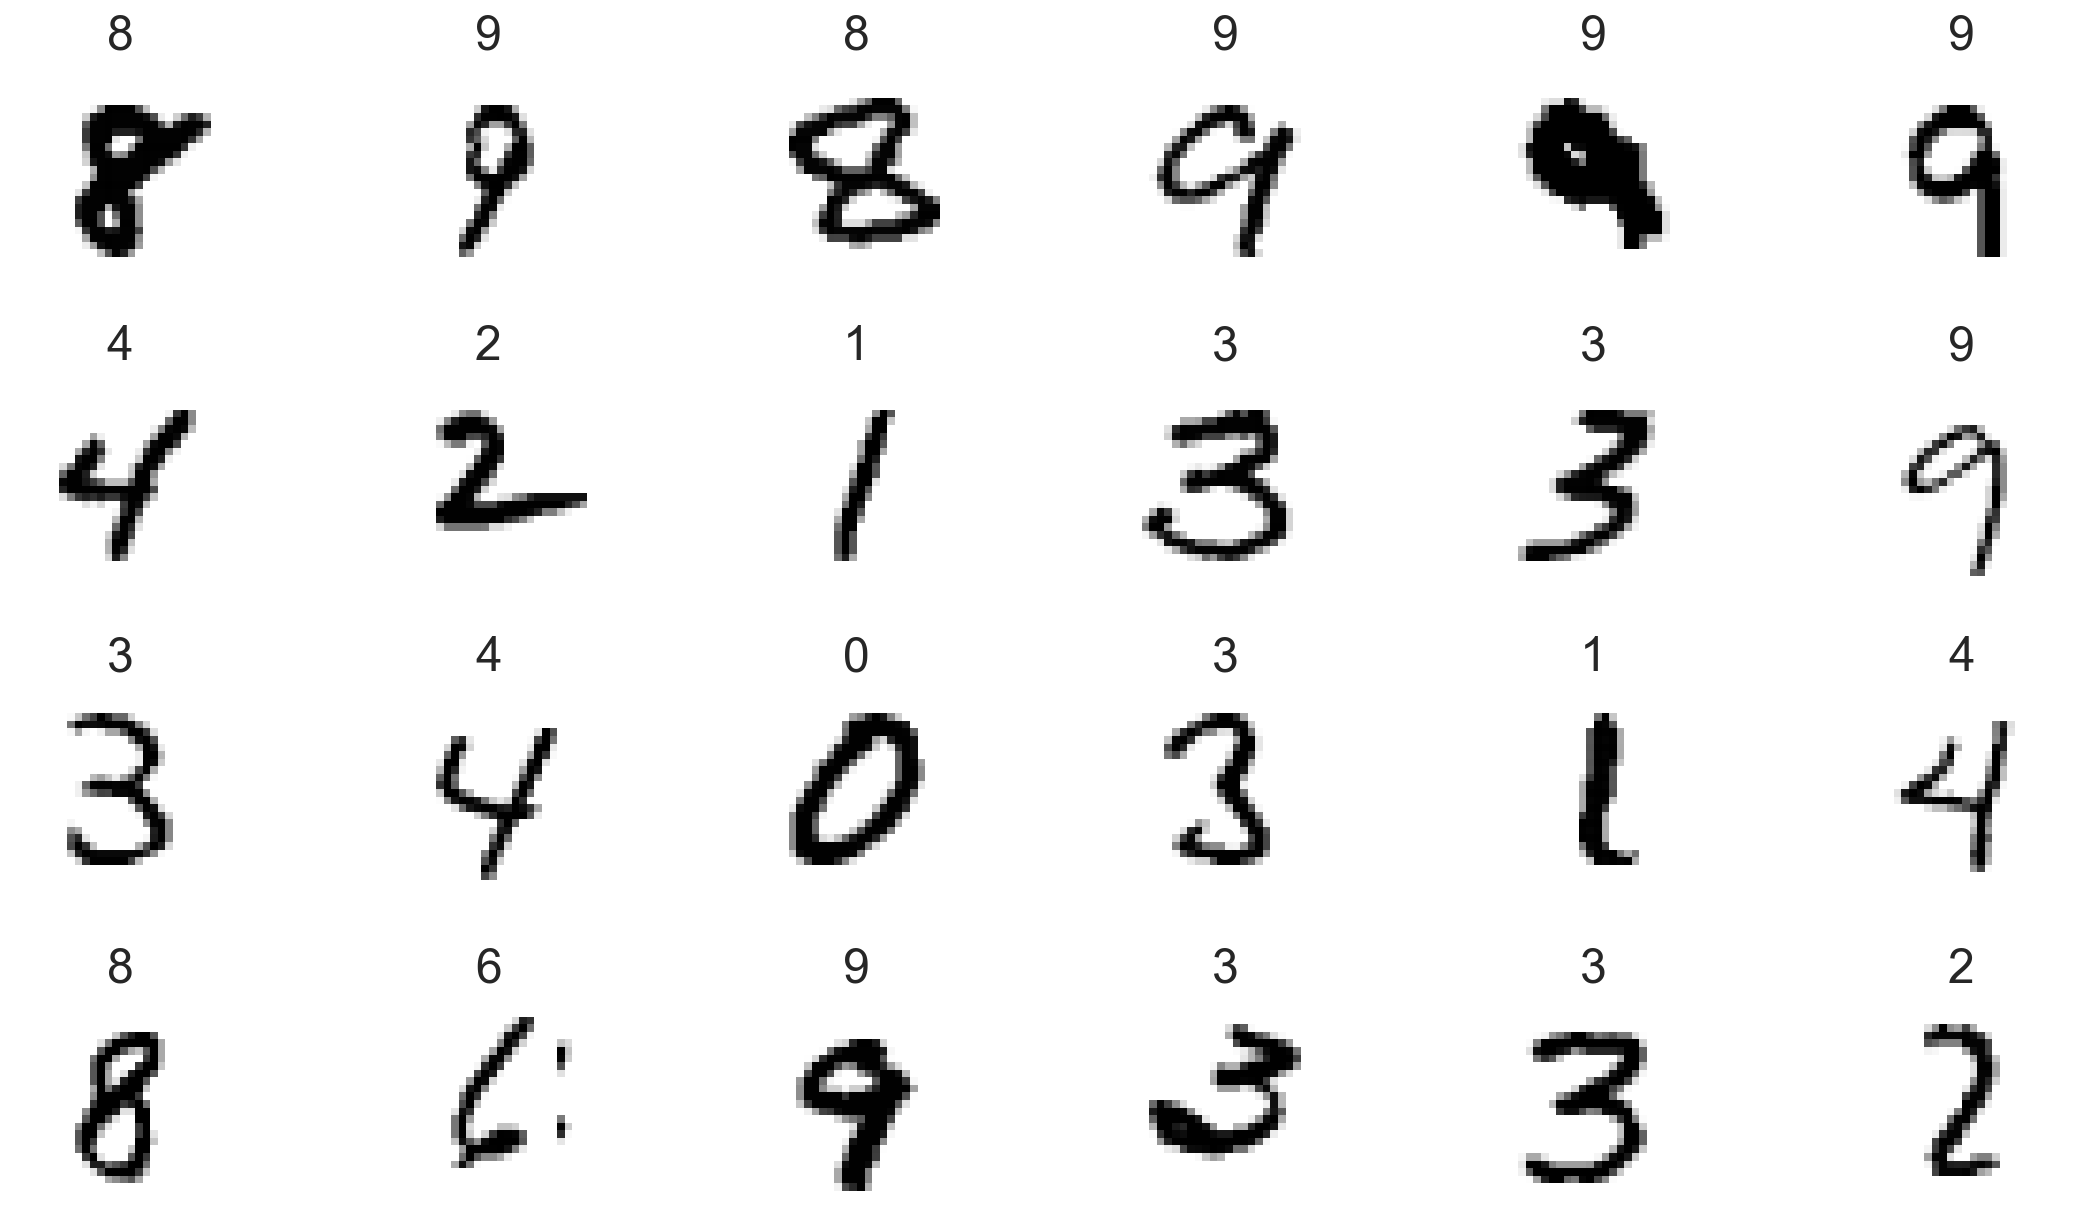

In [12]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [13]:
sns.set(font_scale=1)  # reset font scale--Not in book's code

## 15.6.3 Data Preparation
### Reshaping the Image Data 

In [14]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
X_test.shape

(10000, 28, 28, 1)

### Normalizing the Image Data

In [18]:
X_train = X_train.astype('float32') / 255

In [19]:
X_test = X_test.astype('float32') / 255

### One-Hot Encoding: Converting the Labels From Integers to Categorical Data

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train)

In [22]:
y_train.shape

(60000, 10)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_test = to_categorical(y_test)

In [25]:
y_test.shape

(10000, 10)

## 15.6.4 Creating the Neural Network

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
cnn = Sequential()

### Adding Layers to the Network

In [28]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

### Convolution 
### Adding a **`Conv2D`** Convolution Layer to Our Model 

In [29]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

Instructions for updating:
Colocations handled automatically by placer.


### Dimensionality of the First Convolution Layer’s Output
### Overfitting
### Adding a Pooling Layer

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

### Adding Another Convolutional Layer and Pooling Layer

In [31]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [32]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

### Flattening the Results

In [33]:
cnn.add(Flatten())

### Adding a **`Dense`** Layer to Reduce the Number of Features

In [34]:
cnn.add(Dense(units=128, activation='relu'))

### Adding Another **`Dense`** Layer to Produce the Final Results

In [35]:
cnn.add(Dense(units=10, activation='softmax'))

### Printing the Model’s Summary

In [36]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

### Visualizing a Model’s Structure

In [37]:
from tensorflow.keras.utils import plot_model

In [38]:
from IPython.display import Image

In [39]:
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)

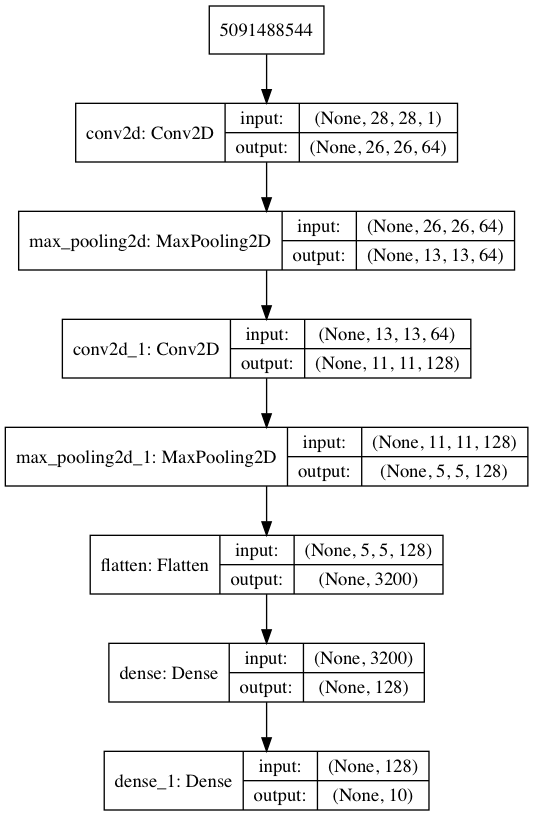

In [40]:
Image(filename='convnet.png') 

### Compiling the Model

In [41]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

## 15.6.5 Training and Evaluating the Model 

In [42]:
from tensorflow.keras.callbacks import TensorBoard

import time

tensorboard_callback = TensorBoard(log_dir=f'./logs/mnist{time.time()}',   
    histogram_freq=1, write_graph=True)

In [ ]:
cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, 
        callbacks=[tensorboard_callback])

Train on 54000 samples, validate on 6000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
54000/54000 [==============================] - 71s 1ms/sample - loss: 0.1446 - acc: 0.9560 - val_loss: 0.0448 - val_acc: 0.9857
Epoch 2/10
54000/54000 [==============================] - 68s 1ms/sample - loss: 0.0441 - acc: 0.9863 - val_loss: 0.0472 - val_acc: 0.9867
Epoch 3/10
54000/54000 [==============================] - 67s 1ms/sample - loss: 0.0291 - acc: 0.9910 - val_loss: 0.0442 - val_acc: 0.9875
Epoch 4/10
54000/54000 [==============================] - 68s 1ms/sample - loss: 0.0226 - acc: 0.9928 - val_loss: 0.0375 - val_acc: 0.9895
Epoch 5/10
 8384/54000 [===>..........................] - ETA: 50s - loss: 0.0102 - acc: 0.9973

### Evaluating the Model

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

In [ ]:
loss

In [ ]:
accuracy

### Making Predictions

In [ ]:
predictions = cnn.predict(X_test)

In [ ]:
y_test[0]

In [ ]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

### Locating the Incorrect Predictions

In [ ]:
images = X_test.reshape((10000, 28, 28))

In [ ]:
incorrect_predictions = []

In [ ]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

### Visualizing Incorrect Predictions

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

### Displaying the Probabilities for Several Incorrect Predictions

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [ ]:
display_probabilities(predictions[583])

In [ ]:
display_probabilities(predictions[625])

In [ ]:
display_probabilities(predictions[1299])

## 15.6.6 Saving and Loading a Model

In [ ]:
cnn.save('mnist_cnn.h5')

In [ ]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################